# Computer Homework 6: More on Numerical solutions to $RC$ circuits

This assignment is first, largely an exercise in markdown, and second, an extension of what you did for the previous assignment.  The exercise in markdown is important because good code is well documented.  Markdown in a jupyter notebook is *one* such option for documentation.  It should be easy to read and see what is going on without looking directly at code.  The extension here is that you have a more complex circuit, such that you will need to do some additional arithmetic steps to determine the form of the time constant.  

## Reminder from last time.... 
Most simple circuits can be solved using a variety of techniques.  As circuits become more complicated, or as the signals the circuits are processing become more complicated, finding an exact solution can become more difficult.  

We learned in class that
\begin{equation}
I = \frac {dQ} {dt}
\end{equation}

This simple definition implies that many circuits can be expressed in the language of differential equations. The purpose of this assignment is to learn how to solve these equations numerically. 

Consider a first-order equations of the form:
\begin{equation}
\frac {dx} {dt} = f(x,t).
\end{equation}

The solution to this equation is a function $x(t)$ whose first derivative is $f$.
To find the solution to such an equation, we also need boundary conditions, or starting points.  Suppose that we have a first-order differential equation and know the value of $x$ for some specific time $t$, that is we know $x(t)$.  The we can write the value of x some short time later as
\begin{equation}
x(t+h) = x(t) + h \frac {dx} {dt} + \frac 1 2 h^2 \frac {d^2x} {dt^2} + ...
\end{equation}

\begin{equation}
x(t+h) = x(t) + h f(x,t) + h^2 \frac {df(x,t)} {dt} + ...
\end{equation}

If $h$ is small then $h^2$ is really small, and we can ignore it, and all higher terms of $h^n$.  This technique is called Euler's method.

Using this, if we know the value of $x$ at some time $t$ we can find the value at some short time later.  We can then repeat this process and understand how $x$ changes over time. The set of $x$ values at a discrete set of $t$ values is the numerical solution to our differential equation.

In the last assignment we used this method to find the current, voltages and charges in two simpler circuits, discharging and charging a capacitor.  We will still work with circuits that we can solve analytically so we can verify the numerical solution. In this assignment, we will consider a circuit that is a little more difficult.


## Import the usual libraries

In [3]:
import numpy as np                         # numpy is a library that inclues most of the numerical funciton you will need
import matplotlib.pyplot as plt            # this is the library we use to plot


# Computer Homework 6: A more complex circuit
### This assignment is due Thursday 2/20 at 12pm.

In the problems above, you considered a simple $RC$ circuit. Now consider something a little more complicated:
<img src="http://www-personal.umich.edu/~gerdes/img/RC_1.jpg" height="400" width="400">

You've seen this circuit in class, and one of your written homeworks is to determine the time constant, $\tau_c$, for charging the capacitor (**see lecture slides for the answer**). Your task now is to model this circuit numerically using the same techniques as you employed for the simple $RC$ circuit above. Assume the values of the components are all known (we'll specify exact values soon), and that the capacitor is uncharged at $t=0$. Your goal is to find the charge $Q$ on the capacitor, and the three currents $I_1$, $I_2$, and $I_3$, as a function of time.  

<b>Part 1 (5 points):</b> Use Kirchhoff's rules to write down four linearly independent equations involving the three unknowns $Q$, $I_1$, $I_2$, and $I_3$. You should already have done this on your written homework. Enter them in LaTeX format by modifying the cell below. (There are LaTeX tips in the comments in the next cell.)

Example equations in LaTeX:

\begin{eqnarray}
     a + b & = & c   \\     % this is a comment. The \\ tells LaTeX to start a new line. 
     x + y & = & z   \\
     \frac{1}{2} + \frac{1}{3} & = & \frac{5}{6} \\ % This is how you enter fractions. 
     E & = & mc^2  % 
\end{eqnarray} 

Also, in-line math looks like this: $P_{diss} = I^2 R$

*Write your equations in this markdown cell.  For further reference, here is a [markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)*

<b>One solution:</b>
\begin{eqnarray}
 I_{1}  & = &  I_{2}+ I_{3} ~~~~~~~~~(1)  \\
 I_1R_1 + I_{2}R_{2} + \frac{Q}{C} &  = & V~~~~~~~~~~~~~~~~~(2) \\
 I_2R_2 + \frac{Q}{C} & = & I_3R_3 ~~~~~~~~~~~~(3)\\
  I_2 & = & \frac{dQ}{dt}~~~~~~~~~~~~(4)
\end{eqnarray} 

<b>Part 2 (10 points):</b> In markdown below, define and analytically calculate your initial conditions as a function of $V$, $R_1$, $R_2$, and $R_3$. You are assuming that the capacitor is initially uncharged, and the battery
is connected at $t=0$.  **Your initial conditions should consist of the initial values of $I_1$, $I_2$, $I_3$, and $Q$.**

*Enter your initial conditions here in markdown.  Hint: You can look at the contents of other markdown cells to see how to get markdown to nicely render equations.  Or, refer to the cheatsheet link above if you want to experiment with something fancier.*


<b> Solution:</b> At $t=0$, the capacitor acts like a wire, and the circuit looks like the resistor $R_1$ in series with the parallel combination of $R_2$ and $R_3$. Thus, $R_{eq}(t=0) = R_1 + R_2R_3/(R_2 + R_3)$. So our initial conditions are:
\begin{eqnarray}
I_1 & = & V/R_{eq} \\
I_2 & = & \frac{V}{R_{eq}}\frac{R_2}{R_2 + R_3}\\
I_3 & = & \frac{V}{R_{eq}}\frac{R_3}{R_2 + R_3} \\
Q & = & 0
\end{eqnarray}

<b>Step 3 (15 points):</b> Solve the circuit. You will need to loop over timesteps, similar to what you did for the simple circuit in the previous assignment (look up the previous assignment!), and update the values of each unknown quantity at each step according to the equations you wrote down in Step 1. 

To do this, you'll need to choose some specific values for the components, so let's pick:
* $V = 10$ V
* $R_1 = 10~\Omega$
* $R_2 = 20~\Omega$
* $R_3 = 15~\Omega$
* $C = 1.0~\mu$F

Full credit for making the following plots:

(1) $I_1$ vs. time, $I_2$ vs. time, and $I_3$ vs. time

(2) $V_{\mathrm{Cap}}$ vs. time

* First, you need to define your constants that set up the problem.  See above.

In [4]:
# Define constants here.
V = 10
R1 = 10
R2 = 20
R3 = 15
C = 1e-6

* Next, you need to set up constants that are relevant to your problem, such as your analytically calculated time constant for this circuit.    Based on the time constant, you can define your timesteps.

In [5]:
# Define time constant and steps

RC = (R2 + R1*R3/(R1 + R3))*C # Time constant from solving
dt = RC/100
timesteps = np.arange(0, 5*RC, dt)  # 5 time constants should be enough to see the asymptotic behavior

* Next, you will need to create placeholder arrays to fill with computed values at each timestep and the initial conditions based on your answer in **Part 1** .  Hint:  In the last homework you used np.zeros, and you will need $I_1(t)$, $I_2(t)$, $I_3(t)$, and $V_{Cap}(t)$ for the plots. 

In [6]:
#  Create your place holder arrays and initial conditions here.
Qarray = np.zeros(timesteps.shape)
I1array = np.zeros(timesteps.shape)
I2array = np.zeros(timesteps.shape)
I3array = np.zeros(timesteps.shape)

Q = 0
Req = R1 + R2*R3/(R2+R3)  # equivalent resistance at t=0
I1 = V/Req
I2 = I1*R3/(R2+R3)
I3 = I1*R2/(R2+R3)

* Now, you will need to loop over saving values and updating values for each iteration of the timestep

In [7]:
#  Write your loop here
for i, timestep in enumerate(timesteps):
    # First save the values at this time step:
    I1array[i] = I1
    I2array[i] = I2
    I3array[i] = I3
    Qarray[i] = Q
    # Now update:
    I3 = (I2*R2 + Q/C)/R3         # this is equation (3), rearranged to solve for I3
    I2 = (V - I1*R1 - Q/C)/R2     # this is equation (2), rearranged to solve for I2
    I1 = I2 + I3                  # this is equation (1) above
    dQ = I2*dt                    # this is equation (4)
    Q +=dQ                        # update Q with its new value

* Make your plots below.  Try using zip to minimize lines of code and plot on three axes on the same figure for (1). 

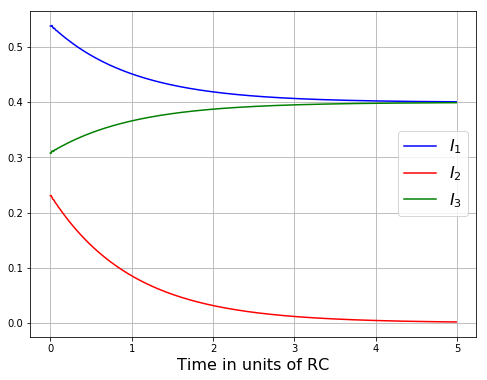

In [9]:
# Time evolution of current here
fig, ax = plt.subplots(1, figsize=(8,6))
ax.plot(timesteps/RC, I1array, color='b', label='$I_1$')
ax.plot(timesteps/RC, I2array, color='r', label='$I_2$')
ax.plot(timesteps/RC, I3array, color='g', label='$I_3$')
ax.set_xlabel('Time in units of RC', fontsize=16)
ax.legend(fontsize=16)
ax.grid()

<b>Commentary:</b> Notice that $I_2$ drops to zero as expected. A long time after the switch is closed, $R_1$ and $R_3$ are in series, so the currents in these resistors approach the same value.

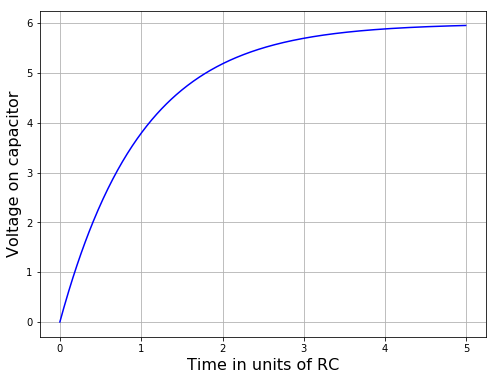

In [10]:
# Time evolution of the voltage across capacitor.
fig, ax = plt.subplots(1, figsize=(8,6))
ax.plot(timesteps/RC, Qarray/C, color='b')
ax.set_xlabel('Time in units of RC', fontsize=16)
ax.set_ylabel('Voltage on capacitor', fontsize=16)
ax.grid()

<b>Part 4 (10 points): Reflections and Sanity Checks</b>
* First, calculate (analytically) the voltage on the capacitor after a long time. Does your numerical result agree with the calculation?  To what extent do they agree (one option is to show the percent error between the two)?

<b> Example solution:</b>
A long time after the switch is closed, current flows only through the series combination of $R_1$ and $R_3$. In this case, the current from the battery is $I = V/(R_1 + R_3)$, and the voltage drop across the capacitor is 
$$V_C = V - IR_1 = 10\left( 1 - \frac{R_1}{R_1 + R_3}\right) = 6~V.$$ This agrees with the plot above.

* Next, pick any loop in the circuit. Is the loop rule satisfied at all times for this loop?  To what extent is the loop rule satisfied? You can plot the results of the loop rule, showing the summed voltage in the loop vs. time.  How might you this more accurate?


For the loop rule, consider the left-hand loop that consists of the battery, $R_1$, $R_2$, and $C$. We need the voltage drops across the last three elements to add up to $V$. The voltages *should* add up to 10 V at all times. If we plot the sum, the loop rule isn't <u>exactly</u> satisfied, but it is good to about 0.5%, which seems reasonable given our time step.  Here's a plot:

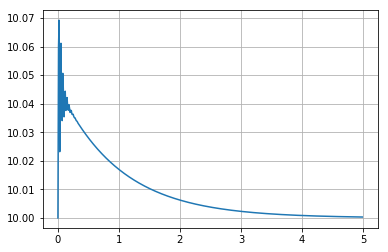

In [12]:
# Plot of loop rule
sum_of_drops = I1array*R1 + I2array*R2 + Qarray/C
plt.plot(timesteps/RC, sum_of_drops)
plt.grid()

* What is the time constant for charging the capacitor as calculated by your program? Does it agree with the result you obtained analytically?  To what extent?

If we look at the fraction, these agree very well, so we conclude that our program has correctly determined the time constant.

In [13]:
Q_final = Qarray[-1]
Q_1RC = Qarray[100]
fraction_charged = Q_1RC/Q_final
fraction_expected = 1 - np.exp(-1)
print('Fraction charged:' , round(fraction_charged,3))
print('Fraction expected:' , round(fraction_expected,3))

Fraction charged: 0.637
Fraction expected: 0.632
